Import libraries and frameworks, set parameters for ploting and warnings.

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('classic')

Dataset link: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code

Reading data.

In [196]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [197]:
# data shape
data.shape

(7043, 21)

In [198]:
# data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We see a lot of object dtypes in our data, let's handle them in our next chapter!

EDA processing and Feature Engineering.

In [199]:
# for first, we delete customer id column, cause its unnecessary for our model

data.drop('customerID', axis = 'columns', inplace = True)
data.shape

(7043, 20)

In [200]:
# categorical features list

def unique_values_of_cat():
    cat_features = [col for col in data.columns if data[col].dtype == 'O']
    for col in data.columns:
        if data[col].dtype == 'O':
            print(f'{col} - {data[col].unique()}')
    return cat_features
    
unique_values_of_cat()

gender - ['Female' 'Male']
Partner - ['Yes' 'No']
Dependents - ['No' 'Yes']
PhoneService - ['No' 'Yes']
MultipleLines - ['No phone service' 'No' 'Yes']
InternetService - ['DSL' 'Fiber optic' 'No']
OnlineSecurity - ['No' 'Yes' 'No internet service']
OnlineBackup - ['Yes' 'No' 'No internet service']
DeviceProtection - ['No' 'Yes' 'No internet service']
TechSupport - ['No' 'Yes' 'No internet service']
StreamingTV - ['No' 'Yes' 'No internet service']
StreamingMovies - ['No' 'Yes' 'No internet service']
Contract - ['Month-to-month' 'One year' 'Two year']
PaperlessBilling - ['Yes' 'No']
PaymentMethod - ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges - ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn - ['No' 'Yes']


['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

We see that even total charges column, which is supposed to be numeric dtype array is typed object.Let's change the dtype of total charges for first.

In [201]:
# data.TotalCharges = data.TotalCharges.astype('float32')

# this cell will output error, so I commented the code and removed error output

We have error due it is missing value in our data it is do not marked as NaN, as it is just an whitespace, so let's look after that rows.

In [202]:
space_charges = data.loc[data.TotalCharges == ' ']
display(space_charges)
print(space_charges.shape)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


(11, 20)


There are 11 rows only with missing values, there will be no affect, that we will drop that rows.

In [203]:
data = data[data.TotalCharges != ' ']
print(data.shape)
data.TotalCharges = data.TotalCharges.astype('float32')

(7032, 20)


We will go further feature engineering, but now, let's do some EDA.

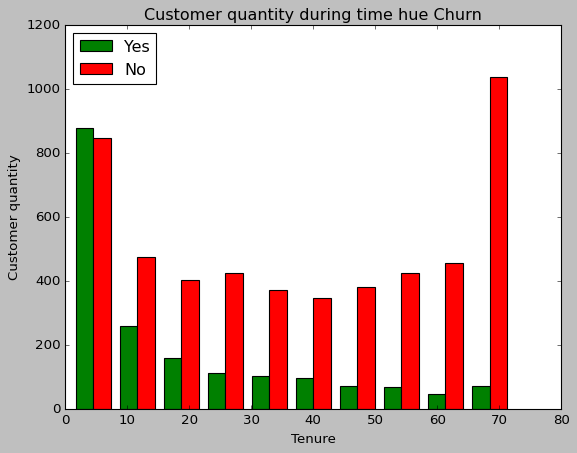

In [204]:
# tenure shows how many months customer is using operator, let's visualize it due churn

tenure_yes = data[data.Churn == 'Yes'].tenure
tenure_no = data[data.Churn == 'No'].tenure

plt.figure(figsize = (8,6))
plt.hist([tenure_yes, tenure_no], color = ['green', 'red'], label = ['Yes', 'No'])
plt.legend(loc = 'upper left')
plt.xlabel('Tenure')
plt.ylabel('Customer quantity')
plt.title('Customer quantity during time hue Churn')
plt.show();

As we see, users who use the operator for a long time do not leave the company, and the most users leave company even when they did not use an operator for 10 months.

Let's do the same technique with total charges, which dtype we changed recently.

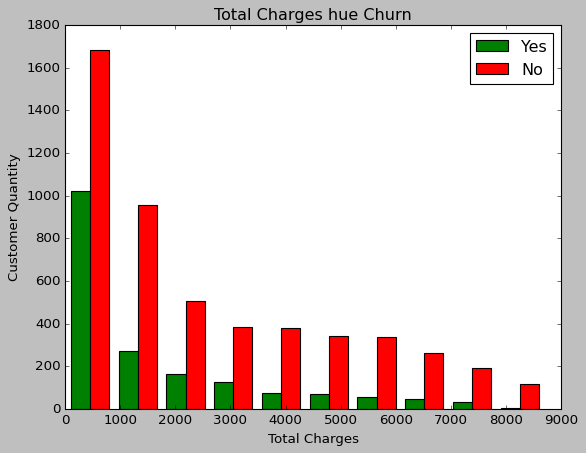

In [205]:
total_charges_yes = data[data.Churn == 'Yes'].TotalCharges
total_charges_no = data[data.Churn == 'No'].TotalCharges

plt.figure(figsize = (8,6))
plt.hist([total_charges_yes, total_charges_no], color = ['green', 'red'], label = ['Yes', 'No'])
plt.legend()
plt.xlabel('Total Charges')
plt.ylabel('Customer Quantity')
plt.title('Total Charges hue Churn')
plt.show();

Due this plot, most of the users who charge their phone too much are staying in company, but they are not so many.

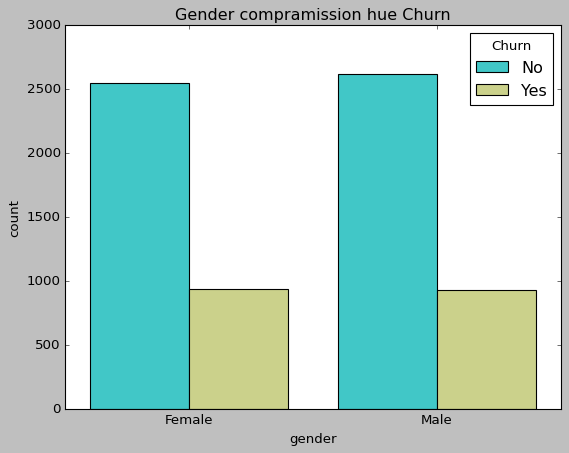

In [206]:
# gender compramission

sns.countplot(data = data, x = 'gender', hue = 'Churn', palette = 'rainbow');
plt.title('Gender compramission hue Churn');

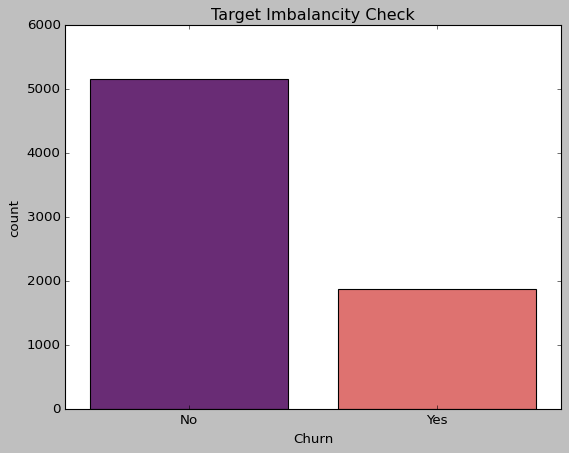

In [207]:
# check class imbalancity

sns.countplot(data = data, x = 'Churn', palette = 'magma');
plt.title('Target Imbalancity Check');

Target is too imbalanced to No, but due it's binary classification, it is not big problem.

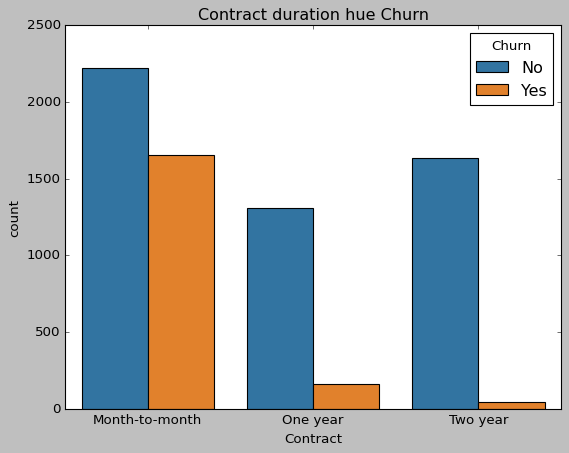

In [208]:
# check contract hue churn

sns.countplot(data = data, x = 'Contract', hue = 'Churn', palette = 'tab10');
plt.title('Contract duration hue Churn');

Most 'leavers' have month-to-month contract type.According to this plots, my opinion is that company need to have some strategy how to impress people to sign long-duration contracts.

Let's continue feature engineering.

In [209]:
unique_values_of_cat()

gender - ['Female' 'Male']
Partner - ['Yes' 'No']
Dependents - ['No' 'Yes']
PhoneService - ['No' 'Yes']
MultipleLines - ['No phone service' 'No' 'Yes']
InternetService - ['DSL' 'Fiber optic' 'No']
OnlineSecurity - ['No' 'Yes' 'No internet service']
OnlineBackup - ['Yes' 'No' 'No internet service']
DeviceProtection - ['No' 'Yes' 'No internet service']
TechSupport - ['No' 'Yes' 'No internet service']
StreamingTV - ['No' 'Yes' 'No internet service']
StreamingMovies - ['No' 'Yes' 'No internet service']
Contract - ['Month-to-month' 'One year' 'Two year']
PaperlessBilling - ['Yes' 'No']
PaymentMethod - ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn - ['No' 'Yes']


['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

We have some additional categories beside Yes or No like no internet service or like that.It will be more reasonable to change their types to No.

In [210]:
# changing with given strategy bellow
changable_features = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for feature in changable_features:
    data.loc[data[feature] != 'Yes', feature] = 'No'

cat_features = unique_values_of_cat()

gender - ['Female' 'Male']
Partner - ['Yes' 'No']
Dependents - ['No' 'Yes']
PhoneService - ['No' 'Yes']
MultipleLines - ['No' 'Yes']
InternetService - ['DSL' 'Fiber optic' 'No']
OnlineSecurity - ['No' 'Yes']
OnlineBackup - ['Yes' 'No']
DeviceProtection - ['No' 'Yes']
TechSupport - ['No' 'Yes']
StreamingTV - ['No' 'Yes']
StreamingMovies - ['No' 'Yes']
Contract - ['Month-to-month' 'One year' 'Two year']
PaperlessBilling - ['Yes' 'No']
PaymentMethod - ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn - ['No' 'Yes']


In [211]:
# dummify data

data = pd.get_dummies(data = data, columns = cat_features, dtype = int)
data.rename(columns = {'Churn_Yes':'Churn'}, inplace = True)
display(data)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn
0,0,1,29.85,29.850000,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.500000,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.150002,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.750000,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.649994,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.500000,0,1,0,1,0,1,...,1,0,0,1,0,0,0,1,1,0
7039,0,72,103.20,7362.899902,1,0,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
7040,0,11,29.60,346.450012,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
7041,1,4,74.40,306.600006,0,1,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1


Data Preparation

In [212]:
# X and y

X = data.drop('Churn', axis = 1)
y = data.Churn

In [235]:
# scale data
scaling_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
X[scaling_features] = scaler.fit_transform(X[scaling_features])


In [214]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (5625, 39)
X test shape: (1407, 39)
y train shape: (5625,)
y test shape: (1407,)


Model building with Tensorflow.

In [216]:
model = keras.Sequential([
    keras.layers.Dense(23, input_shape = (39,), activation = 'relu'),
    keras.layers.Dense(18, activation = 'relu'),
    keras.layers.Dense(13, activation = 'relu'),
    keras.layers.Dense(8, activation = 'relu'),
    keras.layers.Dense(3, activation = 'tanh'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4087 - accuracy: 0.8711
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.1274 - accuracy: 1.0000
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.0803 - accuracy: 1.0000
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 1.0000
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 1.0000
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.0339 - accuracy: 1.0000
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 1.0000
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.0224 - accuracy: 1.0000
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.0186 - accuracy: 1.0000
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.0157 - accura

In [222]:
y_pred = model.predict(X_test)
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 3ms/step - loss: 3.3403e-06 - accuracy: 1.0000


[3.340316879985039e-06, 1.0]

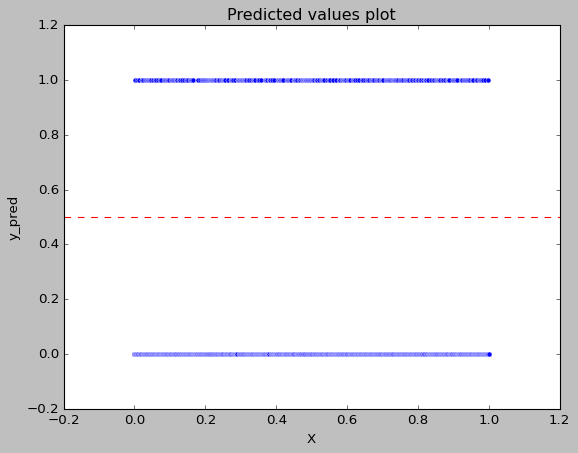

In [229]:
# cause sigmoid gives us values beetwen 0 and 1, we choose labels according parameters that set in for loop

prediction_labels = []
y_pred = y_pred.flatten()
for elem in y_pred:
    if elem > 0.5:
        prediction_labels.append(1)
    else:
        prediction_labels.append(0)

# plot values
fig, ax = plt.subplots()
sns.scatterplot(x = np.linspace(0,1,len(y_pred)), y = y_pred)
ax.axhline(0.5, color = 'red', linestyle = '--')
plt.xlabel('X')
plt.ylabel('y_pred')
plt.title('Predicted values plot')
plt.show(); 

The cell bellow have been written before some manipulations with data, which I have made and accuracy became 1.

Before that as I mentioned in comment, sigmoid returned me values 0 from 1 chaotically, now values of y_pred are very close to 1 and 0.

What I did?

1) I changed drop_first in dummie part to False(just removed it).

2) For first experiement I choose 3 layers(relu, tanh, sigmoid).Then I decided to add some new 2 relu layers.

3) I choose strategy to decrease neuron quantity from 23 by 5. 23 is the first shape after applying dummie with drop_first.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1033
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1407
   macro avg       1.00      1.00      1.00      1407
weighted avg       1.00      1.00      1.00      1407



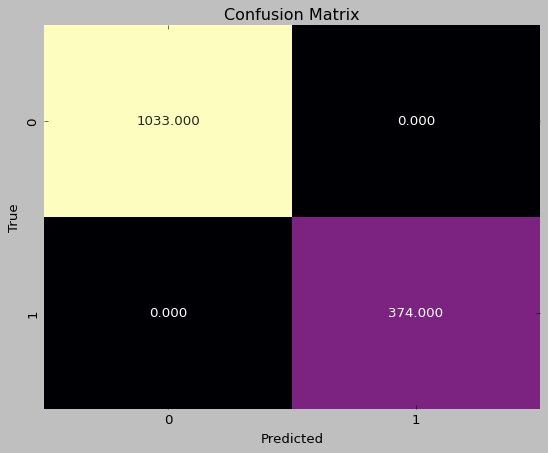

In [230]:
# evaluation of classification

print(classification_report(y_test, prediction_labels))
sns.heatmap(data = confusion_matrix(y_test, prediction_labels), annot = True, fmt = '.3f', cmap = 'magma', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show();